In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

# Modular arithmetics

Some applications of modular arithmetics

## Scytale cipher

[Scytale](https://en.wikipedia.org/wiki/Scytale) is a transposition cipher. 

### Encrypting

Suppose the rod allows one to write four letters around in a circle and five letters down the side of it.
The [[plaintext]] could be: "I am hurt very badly help".

To encrypt, one simply writes across the leather:

```
_____________________________________________________________
       |   |   |   |   |   |  |
       | I | a | m | h | u |  |
     __| r | t | v | e | r |__|
    |  | y | b | a | d | l |
    |  | y | h | e | l | p |
    |  |   |   |   |   |   |
_____________________________________________________________
```

so the ciphertext becomes, "Iryyatbhmvaehedlurlp" after unwinding.

### Decrypting

To decrypt, all one must do is wrap the leather strip around the rod and read across. 
The ciphertext is: "Iryyatbhmvaehedlurlp"
Every fifth letter will appear on the same line, so the plaintext (after re-insertion of spaces) becomes: "I am hurt very badly help".



In [9]:
def encode(text, step=4, remove_spaces=True):
    """Transpose the text using the step"""
 
    if remove_spaces:
        text = text.replace(" ", "") # clean whitespace first
    length = len(text)
    passes = length // step
 
    remainder = length % step
    if remainder:
        # pad the string until the next clean division of length / step
        # as uneven division corrupts the transposition
        times_to_pad = step * (passes+1) - length
        text += " " * times_to_pad
        # text length has increased due to rounding up; passes must too
        passes += 1
 
    output = ''
    # for as many times as 'step' goes into length, iterate through 
    # the string, using the pass count as the step. offset by loop count
    for i in range(passes):
        output += text[i::passes]
 
    return output

In [10]:
encode("Hello world")

'Hlodeor lwl '

In [13]:
decode(encode("I am hurt very badly help", remove_spaces=False))

'Ir h tbea almvdp el hry uy  '

In [21]:
def decode(text, step=4):
    """Decode a cypher text using the step"""
 
    output = ''
    # pass count is identical to step
    for i in range(step):
        output += text[i::step]
    # .rstrip() to remove any padded chars
    return output.rstrip()

In [23]:
decode(encode("Hello world"))

'Helloworld'

In [22]:
decode(encode("I am hurt very badly help", remove_spaces=False))

'I am hurt very badly help'

## Checksums

A checksum is a small-sized datum derived from a block of digital data 
for the purpose of detecting errors that may have been introduced during
its transmission or storage. 

A checksum must be of fixed size. We can use modulo arithmetics to bound the size of
the result. The simplest way is to compute the checksum is to sum values of all 
digits, and then take the modulo. 

In [2]:
base = 10
def cksum0(n):
    sum = 0
    while n != 0:
        m = n % 10
        sum += m
        n = n // 10
    return sum % base

Let's see how even this function distributes the checksums. 

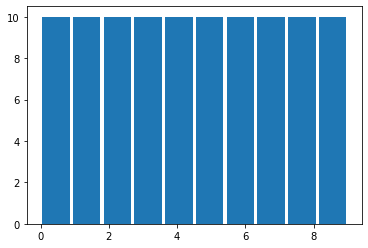

In [3]:
cksums0 = [cksum0(n) for n in range(100)]
_ = plt.hist(cksums0, rwidth=0.9)

Looks uniform, but is it a good function? We want numbers with just a small error to get different checksums.

In [4]:
cksum0(2888919), cksum0(2889919), cksum0(28888819), cksum0(7888919)

(5, 6, 2, 0)

So far, so good. Our algorithm detects simple typos. But does it always work well? Here are two examples where it does not work well. In the first two digits are swapped, in the second the error is in two digits.

In [5]:
print(cksum0(2888919), "|", cksum0(2889819), cksum0(2878929))

5 | 5 5


In [6]:
def digits(n):
    if n == 0:
        return [0]
    
    nums = []
    while n != 0:
        nums.append(n % 10)
        n //= 10
    nums.reverse()
    return nums

def cksum(num):
    """Computes checksum using Luhn's algorithm"""
    cksum = 0

    digs = digits(num)
    ofs = len(digs) % 2 == 0

    for i, n in enumerate(digs):
        if (i + ofs) % 2 == 1:
            cksum += n
        else:
            n_ = n * 2
            cksum += n_ - 9 if n_ > 9 else n_
    return (10 - cksum) % 10

This new checksum works much better, detecting all of the errors

In [97]:
print(cksum(2888919), "|", cksum(2889919), cksum(28888819), cksum(7888919), cksum(2889819), cksum(2878929))

4 | 3 1 3 5 5


## Hash tables

A hash table (a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)) is like an array. One uses an index to access an element, only the index does not have to be a small integer.

In [104]:
phones = {'noy': '0553224098', 'ehud': '0541114139', 'nadav': '0587764127'}
print("Noy's phone is", phones['noy'])
phones['eyal'] = '0505005050'
print("Eyal's phone is", phones['eyal'])

Noy's phone is 0553224098
Eyal's phone is 0505005050


Dictionaries are built into Python, but we can implement them by ourselves. 

In [124]:
def maket(n):
    return [list() for _ in range(n)]

def tset(table, key, value, hash=hash):
    i = hash(key) % len(table)
    entry = table[i]
    for i, (k, v) in enumerate(entry):
        if key==k:
            entry[i] = value
            return
    entry.append((key, value))
        
def tget(table, key, hash=hash):
    i = hash(key) % len(table)
    entry = table[i]
    for i, (k, v) in enumerate(entry):
        if key==k:
            return v
    return None


In [140]:
t = maket(13)

tset(t, 'noy', '0541212312')
tset(t, 'ehud', '0541114139')
tset(t, 'nadav', '0587764127')
print("Noy's phone is", tget(t, 'noy'))
tset(t, 'eyal', '0505005050')
print("Eyal's phone is", tget(t, 'eyal'))

Noy's phone is 0541212312
Eyal's phone is 0505005050


In [141]:
pprint(t)

[[],
 [],
 [],
 [('noy', '0541212312'), ('ehud', '0541114139')],
 [],
 [('eyal', '0505005050')],
 [],
 [],
 [],
 [],
 [('nadav', '0587764127')],
 [],
 []]


## Bonus: hash function

We used the built-in Python hash function, but can write our own. We want a function that maps different strings to different numbers. We can use a polynom for that purpose. 

In [144]:
def hashInt(n):
    """returns hash of an integer
    """
    return n

def hashStr(s):
    """returns hash of a string
    """
    h = 0
    for c in s:
        h = 31*h + ord(c)
    return h

In [153]:
t = maket(13)
tset(t, 'noy', '0541212312', hashStr)
tset(t, 'ehud', '0541114139', hashStr)
tset(t, 'nadav', '0587764127', hashStr)
print("Noy's phone is", tget(t, 'noy', hashStr))
tset(t, 'eyal', '0505005050', hashStr)
print("Eyal's phone is", tget(t, 'eyal', hashStr))

Noy's phone is 0541212312
Eyal's phone is 0505005050


In [154]:
pprint(t)

[[],
 [],
 [],
 [],
 [],
 [],
 [('eyal', '0505005050')],
 [('noy', '0541212312')],
 [],
 [],
 [],
 [('ehud', '0541114139'), ('nadav', '0587764127')],
 []]


In [155]:
# One cannot mix different hash functions, generally.
print("Noy's phone is", tget(t, 'noy') or "unknown")

Noy's phone is unknown
